In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from skimage.color import rgb2gray

In [49]:
# Read the image and convert colorful images to grayscale
lenna = rgb2gray(skio.imread('Lenna.png'))
dora = rgb2gray(skio.imread('dora.png'))
platform = rgb2gray(skio.imread('platform.png'))
hibiscus = skio.imread('hibiscus.png')
einstein = skio.imread('einstein2.png')
balloon = skio.imread('balloon.png')

In [22]:
print(balloon.shape)

(128, 128)


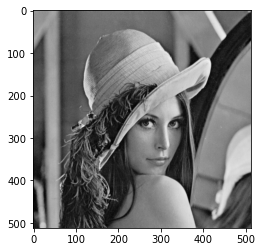

In [22]:
plt.imshow(lenna, cmap="gray")
plt.savefig('lenna_orig.png')

In [8]:
lenna.shape

(512, 512)

(1) Singular Value Decomposition (SVD)

k = 107


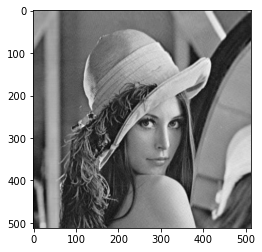

In [23]:
# Use the SVD function to compute SVD of the image
u, s, vh = np.linalg.svd(lenna, full_matrices=True)
r, c = lenna.shape
# Generate a rank-k approximation image
img = np.zeros((r, c))
uh = np.array(u).T
k = 0

for i in range(0, r):
    if s[i]/s[0] >= 0.005:
        img = np.add(img, np.matmul(np.array([uh[i]]).T, np.array([vh[i]])) * s[i])
        k = i+1
    else:
        break
    
print(f'k = {k}')
plt.imshow(img, cmap="gray")
plt.savefig('lenna_auto_{k}.png')

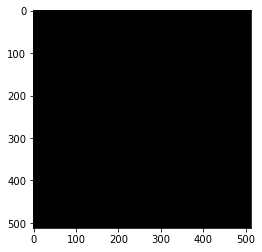

In [27]:
# Use the SVD function to compute SVD of the image
u, s, vh = np.linalg.svd(lenna, full_matrices=True)
r, c = lenna.shape
# Generate a rank-k approximation image
img = np.zeros((r, c))
uh = np.array(u).T
k = 20

for i in range(0, k):
    img = np.add(img, np.matmul(np.array([uh[i]]).T, np.array([vh[i]])) * s[i])

plt.imshow(img, cmap="gray")
# plt.savefig(f'lenna_{k}.png')

(2) Discrete Fourier Transform (DFT)

(3) Haar Transform

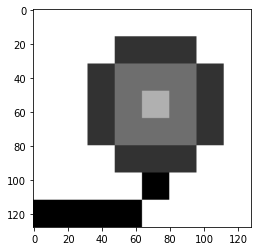

In [50]:
plt.imshow(balloon, cmap="gray")
plt.savefig(f'balloon_orig.png')

In [40]:
h, w = balloon.shape
# Construct the Haar matrix
H = np.zeros((h, w))
H[0, :] = 1
H[1, 0:int(w/2)] = 1
H[1, int(w/2):(w+1)] = -1
for i in range(2, h):
    for j in range(0, w):
        p = math.floor(math.log(i, 2))
        n = i - pow(2, p)
        t = j/w
        if n/pow(2, p) <= t and t < (n+0.5)/pow(2, p):
            H[i][j] = pow(math.sqrt(2), p)
        elif (n+0.5)/pow(2, p) <= t and t < (n+1)/pow(2, p):
            H[i][j] = -pow(math.sqrt(2), p)
H = np.true_divide(H, math.sqrt(h))
Ht = H.transpose()
# Compute the Haar coefficients matrix
G = np.matmul(np.matmul(H, balloon), Ht)
# Generate the approximation of the image using only the coefficients in the upper left corner
img = np.zeros((h, w))
k = 10
for i in range(0,k):
    for j in range(0, k):
        img = np.add(img, np.matmul(np.array([H[i]]).T, np.array([H[j]])) * G[i][j])
plt.imshow(img, cmap="gray")
plt.savefig(f'balloon_HaarTo_{k}.png')

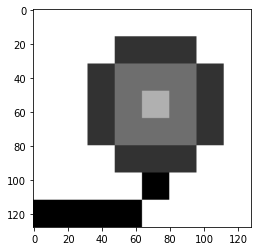

In [32]:
recon = np.matmul(np.matmul(Ht, G), H)
plt.imshow(recon, cmap="gray")
# plt.savefig(f'balloon_Haar.png')


In [39]:
print(G.shape)

(128, 128)


(4) Walsh Transform